## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as pyplot
import pickle
from sklearn import linear_model
from sklearn.utils import shuffle
from matplotlib import style

## Get data file, and print the first 5 values to the console
This lets us check that we have the right data, and see what type of values we're working with!

In [2]:
data = pd.read_csv("forestfires.csv")
print(data.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


## Refine the data
Now that we know what variables we're dealing with, we can refine the data to only deal with values we're using.

In [3]:
data = data[["DMC", "DC", "ISI", "FFMC", "temp", "area", "wind", "rain"]]
print(data.head())

    DMC     DC  ISI  FFMC  temp  area  wind  rain
0  26.2   94.3  5.1  86.2   8.2   0.0   6.7   0.0
1  35.4  669.1  6.7  90.6  18.0   0.0   0.9   0.0
2  43.7  686.9  6.7  90.6  14.6   0.0   1.3   0.0
3  33.3   77.5  9.0  91.7   8.3   0.0   4.0   0.2
4  51.3  102.2  9.6  89.3  11.4   0.0   1.8   0.0


In [4]:
predict = "DC"

x = np.array(data.drop(predict, axis=1))
y = np.array(data[predict])

In [5]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

## Draw a line of best fit:

In [6]:
 linear = linear_model.LinearRegression()
 
 linear.fit(x_train, y_train)
 acc = linear.score(x_test, y_test)
 print(acc)

0.5030653573928027


In [7]:
with open("forestfires.pickle", "wb") as f:
    pickle.dump(linear, f)

In [8]:
pickle_in = open("forestfires.pickle", "rb")
linear = pickle.load(pickle_in)

In [9]:
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

Coefficient: 
 [  2.26000323  -2.66467027   1.60865813   9.29782432  -0.0695668
 -10.70145588 -14.61782657]
Intercept: 
 45.56960447414917


In [10]:
predictions = linear.predict(x_test)

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

857.4437223459757 [207.     8.2   92.1   25.5    1.23   1.8    0.  ] 672.6
938.6133223057548 [290.    7.4  90.3  16.2   0.    3.6   0. ] 855.3
401.1714252700557 [53.3   5.4  88.1  13.7   4.42  1.8   0.  ] 726.9
585.4429832457627 [124.4    8.5   91.2   17.1   11.22   2.2    0.  ] 795.3
610.5487342505797 [130.3   14.1   94.9   23.4    1.29   5.8    0.  ] 587.1
862.970020878323 [248.4   6.3  91.6  16.6   0.    2.7   0. ] 753.8
541.7973008830895 [99.    9.6  92.1  18.7   5.97  2.2   0.  ] 745.3
479.8554375834445 [85.1  15.9  94.3  20.1  26.13  4.9   0.  ] 692.3
566.5247420003637 [141.3  17.7  95.1  19.4  46.7   7.6   0. ] 605.8
579.9465866765947 [142.4  10.6  91.4  16.3   0.    5.4   0. ] 601.4
480.6401332713331 [91.8  7.1 88.6 17.4  0.   5.4  0. ] 709.9
342.0970378954072 [35.8  7.8 91.7 15.2  0.   4.9  0. ] 80.8
578.1643742059248 [102.3    8.4   92.2   23.5    3.33   4.     0.  ] 751.5
593.1968276256281 [124.1    8.5   92.4   16.9   29.48   1.3    0.  ] 680.7
411.19438158072063 [35.4  6.7

## Set up a scatter plot

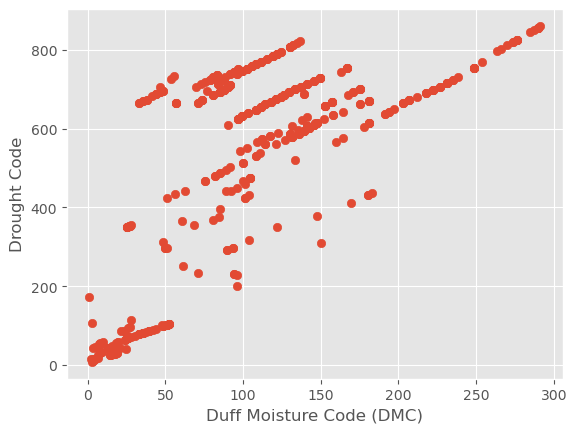

In [11]:
style.use("ggplot")

p = "DMC"
pyplot.scatter(data[p], data["DC"])
pyplot.xlabel("Duff Moisture Code (DMC)")
pyplot.ylabel("Drought Code")
pyplot.show()